11/7/2024:  SDV Version 1.6.12

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
def add_crop(dataframe, name, season, shop_cost, base_price, gold_price, avg_yield, jar_able, jarred_price, growth_time, regrowth, regrowth_time):
    new_crop = {
        'Crop_Name': name,
        'Season': season,
        'Shop_Cost': shop_cost,
        'Base_Price': base_price,
        'Gold_Price': gold_price,
        'Avg_Yield': avg_yield,
        'jar-able': jar_able,
        'Jarred_Price': jarred_price,
        'Growth_Time': growth_time,
        'Regrowth': regrowth,
        'Regrowth_Time': regrowth_time
    }
    return dataframe.append(new_crop, ignore_index=True)

In [47]:
springCropDf = pd.read_csv('Spring_Crops_Data.csv')
summerCropDf = pd.read_csv('Summer_Crops_Data.csv')
fallCropDf = pd.read_csv('Fall_Crops_Data.csv')

#springCropDf.head(3)
#summerCropDf.head(3)
fallCropDf.head(3)

,Crop_Name,Season,Shop_Cost,Base_Price,Gold_Price,Avg_Yield,Jar_able,Jarred_Price,Growth_Time,Regrowth,Regrowth_Time
0,Amaranth,Fall,70,150,225,1,True,350.0,7,False,NaN
1,Artichoke,Fall,30,160,240,1,True,400.0,8,False,NaN
2,Beet,Fall,20,100,150,1,True,250.0,6,False,NaN


In [48]:
all_crops_df = pd.concat([springCropDf, summerCropDf, fallCropDf], ignore_index=True)
all_crops_df

,Crop_Name,Season,Shop_Cost,Base_Price,Gold_Price,Avg_Yield,Jar_able,Jarred_Price,Growth_Time,Regrowth,Regrowth_Time
0,Parsnip,Spring,20.0,35,52,1.00,True,120.0,4,False,NaN
1,Green Bean,Spring,60.0,40,60,1.00,True,130.0,10,True,3.0
2,Cauliflower,Spring,80.0,175,262,1.00,True,400.0,12,False,NaN
3,Potato,Spring,50.0,80,120,1.25,True,210.0,6,False,NaN
4,Tulip,Spring,20.0,30,45,1.00,False,NaN,6,False,NaN
5,Kale,Spring,70.0,110,165,1.00,True,280.0,6,False,NaN
6,Blue Jazz,Spring,30.0,50,75,1.00,False,NaN,7,False,NaN
7,Garlic,Spring,40.0,60,90,1.00,True,170.0,4,False,NaN
8,Rhubarb,Spring,100.0,220,330,1.00,True,550.0,13,False,NaN
9,Strawberry,Spring,100.0,120,180,1.00,True,290.0,8,True,4.0


In [49]:
crops = all_crops_df.copy()

In [50]:
def analytics_processing(df):
    df['Total_Harvests'] = df.apply(lambda row: (28 // row['Growth_Time']) if not row['Regrowth'] else (1 + (28 - row['Growth_Time']) // row['Regrowth_Time']), axis=1)
    df['Season_Yield'] = df['Total_Harvests'] * df['Avg_Yield']
    df['Base_Revenue'] = df['Season_Yield'] * df['Base_Price']
    df['Base_Profit'] = df['Base_Revenue'] - df['Shop_Cost']
    df['Artisan_Profit'] = (df['Jarred_Price'] * df['Season_Yield']) - df['Shop_Cost']
    df['Base_ROI'] = (df['Base_Profit'] / df['Shop_Cost']) * 100
    df['Artisan_ROI'] = (df['Artisan_Profit'] / df['Shop_Cost']) * 100
    df['Processing_Impact'] = df['Artisan_Profit'] / df['Base_Profit']
    return df

spring = analytics_processing(springCropDf)
summer = analytics_processing(summerCropDf)
fall = analytics_processing(fallCropDf)
crops_done = analytics_processing(crops)

In [65]:
best_regrowth_crops = crops_done[crops_done['Regrowth'] == True]
best_regrowth_crops

,Crop_Name,Season,Shop_Cost,Base_Price,Gold_Price,Avg_Yield,Jar_able,Jarred_Price,Growth_Time,Regrowth,Regrowth_Time,Total_Harvests,Season_Yield,Base_Revenue,Base_Profit,Artisan_Profit,Base_ROI,Artisan_ROI,Processing_Impact
1,Green Bean,Spring,60.0,40,60,1.0,True,130.0,10,True,3.0,7.0,7.0,280.0,220.0,850.0,366.666667,1416.666667,3.863636
9,Strawberry,Spring,100.0,120,180,1.0,True,290.0,8,True,4.0,6.0,6.0,720.0,620.0,1640.0,620.000000,1640.000000,2.645161
10,Coffee Bean,Spring,2500.0,15,22,4.0,False,NaN,10,True,2.0,10.0,40.0,600.0,-1900.0,NaN,-76.000000,NaN,NaN
13,Blueberry,Summer,80.0,50,75,3.0,True,150.0,13,True,4.0,4.0,12.0,600.0,520.0,1720.0,650.000000,2150.000000,3.307692
14,Corn,Summer,150.0,50,75,1.0,True,150.0,14,True,4.0,4.0,4.0,200.0,50.0,450.0,33.333333,300.000000,9.000000
15,Hops,Summer,60.0,25,37,1.0,False,NaN,11,True,1.0,18.0,18.0,450.0,390.0,NaN,650.000000,NaN,NaN
16,Hot Pepper,Summer,40.0,40,60,1.0,True,130.0,5,True,3.0,8.0,8.0,320.0,280.0,1000.0,700.000000,2500.000000,3.571429
24,Tomato,Summer,50.0,60,90,1.0,True,150.0,11,True,4.0,5.0,5.0,300.0,250.0,700.0,500.000000,1400.000000,2.800000
30,Corn,Fall,150.0,50,75,1.0,True,150.0,14,True,4.0,4.0,4.0,200.0,50.0,450.0,33.333333,300.000000,9.000000
31,Cranberries,Fall,240.0,75,112,2.0,True,200.0,7,True,5.0,5.0,10.0,750.0,510.0,1760.0,212.500000,733.333333,3.450980


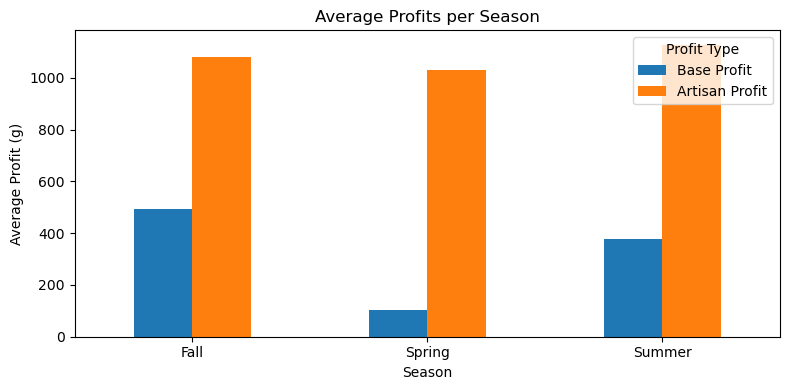

In [56]:
# Plot the average profits per season
avg_profits_per_season = crops_done.groupby('Season')[['Base_Profit', 'Artisan_Profit']].mean()

plt.figure(figsize=(8, 4))
avg_profits_per_season.plot(kind='bar', ax=plt.gca())
plt.title('Average Profits per Season')
plt.xlabel('Season')
plt.ylabel('Average Profit (g)')
plt.xticks(rotation=0)
plt.legend(['Base Profit', 'Artisan Profit'], title="Profit Type")
plt.tight_layout()
plt.show()

In [ ]:
crops_done.to_csv('crop_analysis.csv', index=False)